In [1]:
!which python

/home/paperspace/anaconda3/envs/fastai/bin/python


In [2]:
import enum
import math
import pdb
import platform
import time

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm_notebook

from ssdmultibox.criterion import SSDLoss
from ssdmultibox.datasets import PascalDataset, TrainPascalFlatDataset, device
from ssdmultibox.models import SSDModel
from ssdmultibox import utils

import matplotlib.pyplot as plt
plt.ion()

In [3]:
device

device(type='cuda', index=0)

In [4]:
losses = {'total':[], 'loc':[], 'conf':[]}

In [5]:
model = SSDModel().to(device)

In [6]:
LR = 1e-2

criterion = SSDLoss(alpha=.2)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=0.0005)
current_time = time.time()

In [7]:
TrainPascalFlatDataset.__len__ = lambda self: 4

train_dataset = TrainPascalFlatDataset()

len(train_dataset)

4

In [8]:
train_dataset

In [9]:
NUM_WORKERS = utils.get_cpu_count()

# if platform.system() == 'Darwin': # Mac
#     BATCH = 4
#     SHUFFLE = False
# else:
#     BATCH = 32
#     SHUFFLE = True

BATCH = 4
SHUFFLE = False
    
dataloader = DataLoader(train_dataset, batch_size=BATCH, shuffle=SHUFFLE, num_workers=NUM_WORKERS)

In [48]:
EPOCHS = 200

for epoch in range(EPOCHS):
    steps = math.ceil(len(train_dataset) / BATCH)
    for step in tqdm_notebook(range(steps)):
        image_ids, ims, gt_bbs, gt_cats = next(iter(dataloader))

        # put data on device
        ims, gt_bbs, gt_cats = PascalDataset.to_device(ims, gt_bbs, gt_cats)

        # zero out gradients
        optimizer.zero_grad()

        # forward pass
        preds = model(ims)
        loss, loc_loss, conf_loss = criterion(preds, (gt_bbs, gt_cats))

        # backward pass
        loss.backward()
        optimizer.step()

        # stats
        if step % 5 == 0:
            print('epoch: {} step: {} loss: {:.4f} time: {:.4f}'.format(
                epoch, step, loss.item(), time.time() - current_time))
            current_time = time.time()
            losses['total'].append(loss.item())
            losses['loc'].append(loc_loss.item())
            losses['conf'].append(conf_loss.item())

pos_loss: 112.3489 neg_hard_mining_loss: 344.8733
n: 37.0 bbs_loss: 544.1808 cats_loss: 457.2222
epoch: 0 step: 0 loss: 27.0649 time: 700.6466


pos_loss: 112.2772 neg_hard_mining_loss: 341.9413
n: 37.0 bbs_loss: 544.1751 cats_loss: 454.2185
epoch: 1 step: 0 loss: 26.9836 time: 0.5064


pos_loss: 112.1865 neg_hard_mining_loss: 339.9093
n: 37.0 bbs_loss: 544.1680 cats_loss: 452.0958
epoch: 2 step: 0 loss: 26.9260 time: 0.5237


pos_loss: 112.0860 neg_hard_mining_loss: 339.1512
n: 37.0 bbs_loss: 544.1597 cats_loss: 451.2372
epoch: 3 step: 0 loss: 26.9026 time: 0.5338


pos_loss: 111.9739 neg_hard_mining_loss: 338.4865
n: 37.0 bbs_loss: 544.1501 cats_loss: 450.4604
epoch: 4 step: 0 loss: 26.8814 time: 0.5278


pos_loss: 111.8487 neg_hard_mining_loss: 337.8940
n: 37.0 bbs_loss: 544.1393 cats_loss: 449.7427
epoch: 5 step: 0 loss: 26.8617 time: 0.5260


pos_loss: 111.7107 neg_hard_mining_loss: 337.3928
n: 37.0 bbs_loss: 544.1279 cats_loss: 449.1036
epoch: 6 step: 0 loss: 26.8441 time: 0.5519


pos_loss: 111.5637 neg_hard_mining_loss: 336.6177
n: 37.0 bbs_loss: 544.1152 cats_loss: 448.1813
epoch: 7 step: 0 loss: 26.8188 time: 0.5285


pos_loss: 111.4092 neg_hard_mining_loss: 335.6691
n: 37.0 bbs_loss: 544.1019 cats_loss: 447.0783
epoch: 8 step: 0 loss: 26.7887 time: 0.5420


pos_loss: 111.2485 neg_hard_mining_loss: 334.6364
n: 37.0 bbs_loss: 544.0874 cats_loss: 445.8849
epoch: 9 step: 0 loss: 26.7560 time: 0.5162


pos_loss: 111.0805 neg_hard_mining_loss: 333.6792
n: 37.0 bbs_loss: 544.0717 cats_loss: 444.7597
epoch: 10 step: 0 loss: 26.7252 time: 0.5136


pos_loss: 110.9027 neg_hard_mining_loss: 332.6878
n: 37.0 bbs_loss: 544.0553 cats_loss: 443.5904
epoch: 11 step: 0 loss: 26.6931 time: 0.5027


pos_loss: 110.7152 neg_hard_mining_loss: 331.5751
n: 37.0 bbs_loss: 544.0384 cats_loss: 442.2903
epoch: 12 step: 0 loss: 26.6575 time: 0.5331


pos_loss: 110.5180 neg_hard_mining_loss: 330.4115
n: 37.0 bbs_loss: 544.0209 cats_loss: 440.9295
epoch: 13 step: 0 loss: 26.6203 time: 0.5390


pos_loss: 110.3111 neg_hard_mining_loss: 329.1953
n: 37.0 bbs_loss: 544.0026 cats_loss: 439.5063
epoch: 14 step: 0 loss: 26.5813 time: 0.5286


pos_loss: 110.0948 neg_hard_mining_loss: 327.9409
n: 37.0 bbs_loss: 543.9833 cats_loss: 438.0356
epoch: 15 step: 0 loss: 26.5411 time: 0.4967


pos_loss: 109.8688 neg_hard_mining_loss: 326.7601
n: 37.0 bbs_loss: 543.9628 cats_loss: 436.6288
epoch: 16 step: 0 loss: 26.5025 time: 0.5146


pos_loss: 109.6322 neg_hard_mining_loss: 325.5150
n: 37.0 bbs_loss: 543.9411 cats_loss: 435.1472
epoch: 17 step: 0 loss: 26.4618 time: 0.5312


pos_loss: 109.3841 neg_hard_mining_loss: 324.1487
n: 37.0 bbs_loss: 543.9183 cats_loss: 433.5328
epoch: 18 step: 0 loss: 26.4176 time: 0.5285


pos_loss: 109.1233 neg_hard_mining_loss: 322.8454
n: 37.0 bbs_loss: 543.8940 cats_loss: 431.9686
epoch: 19 step: 0 loss: 26.3747 time: 0.5264


pos_loss: 108.8459 neg_hard_mining_loss: 321.5583
n: 37.0 bbs_loss: 543.8683 cats_loss: 430.4041
epoch: 20 step: 0 loss: 26.3317 time: 0.5429


pos_loss: 108.5503 neg_hard_mining_loss: 320.0981
n: 37.0 bbs_loss: 543.8409 cats_loss: 428.6484
epoch: 21 step: 0 loss: 26.2835 time: 0.5190


pos_loss: 108.2335 neg_hard_mining_loss: 318.8831
n: 37.0 bbs_loss: 543.8118 cats_loss: 427.1167
epoch: 22 step: 0 loss: 26.2413 time: 0.5427


pos_loss: 107.8950 neg_hard_mining_loss: 317.6512
n: 37.0 bbs_loss: 543.7808 cats_loss: 425.5463
epoch: 23 step: 0 loss: 26.1980 time: 0.5156


pos_loss: 107.5333 neg_hard_mining_loss: 316.3799
n: 37.0 bbs_loss: 543.7477 cats_loss: 423.9132
epoch: 24 step: 0 loss: 26.1530 time: 0.5462


pos_loss: 107.1461 neg_hard_mining_loss: 315.0168
n: 37.0 bbs_loss: 543.7125 cats_loss: 422.1629
epoch: 25 step: 0 loss: 26.1047 time: 0.5486


pos_loss: 106.7320 neg_hard_mining_loss: 313.4883
n: 37.0 bbs_loss: 543.6750 cats_loss: 420.2203
epoch: 26 step: 0 loss: 26.0512 time: 0.5292


pos_loss: 106.2844 neg_hard_mining_loss: 312.0719
n: 37.0 bbs_loss: 543.6344 cats_loss: 418.3564
epoch: 27 step: 0 loss: 25.9998 time: 0.5421


pos_loss: 105.8021 neg_hard_mining_loss: 310.6029
n: 37.0 bbs_loss: 543.5908 cats_loss: 416.4050
epoch: 28 step: 0 loss: 25.9458 time: 0.5510


pos_loss: 105.2810 neg_hard_mining_loss: 309.1045
n: 37.0 bbs_loss: 543.5436 cats_loss: 414.3854
epoch: 29 step: 0 loss: 25.8900 time: 0.5139


pos_loss: 104.7133 neg_hard_mining_loss: 307.5280
n: 37.0 bbs_loss: 543.4921 cats_loss: 412.2413
epoch: 30 step: 0 loss: 25.8306 time: 0.5020


pos_loss: 104.0890 neg_hard_mining_loss: 305.9362
n: 37.0 bbs_loss: 543.4348 cats_loss: 410.0251
epoch: 31 step: 0 loss: 25.7692 time: 0.5426


pos_loss: 103.4032 neg_hard_mining_loss: 304.2550
n: 37.0 bbs_loss: 543.3719 cats_loss: 407.6582
epoch: 32 step: 0 loss: 25.7035 time: 0.5271


pos_loss: 102.6450 neg_hard_mining_loss: 302.5494
n: 37.0 bbs_loss: 543.3022 cats_loss: 405.1943
epoch: 33 step: 0 loss: 25.6350 time: 0.6685


pos_loss: 101.8021 neg_hard_mining_loss: 300.8282
n: 37.0 bbs_loss: 543.2244 cats_loss: 402.6303
epoch: 34 step: 0 loss: 25.5636 time: 0.5321


pos_loss: 100.8657 neg_hard_mining_loss: 299.0500
n: 37.0 bbs_loss: 543.1377 cats_loss: 399.9156
epoch: 35 step: 0 loss: 25.4879 time: 0.5468


pos_loss: 99.8186 neg_hard_mining_loss: 297.1234
n: 37.0 bbs_loss: 543.0400 cats_loss: 396.9420
epoch: 36 step: 0 loss: 25.4049 time: 0.5176


pos_loss: 98.6495 neg_hard_mining_loss: 295.1018
n: 37.0 bbs_loss: 542.9308 cats_loss: 393.7513
epoch: 37 step: 0 loss: 25.3157 time: 0.5184


pos_loss: 97.3300 neg_hard_mining_loss: 293.0370
n: 37.0 bbs_loss: 542.8073 cats_loss: 390.3671
epoch: 38 step: 0 loss: 25.2209 time: 0.5271


pos_loss: 95.8336 neg_hard_mining_loss: 290.8753
n: 37.0 bbs_loss: 542.6667 cats_loss: 386.7090
epoch: 39 step: 0 loss: 25.1183 time: 0.5385


pos_loss: 94.0996 neg_hard_mining_loss: 288.6708
n: 37.0 bbs_loss: 542.5021 cats_loss: 382.7705
epoch: 40 step: 0 loss: 25.0074 time: 0.5466


pos_loss: 92.1184 neg_hard_mining_loss: 286.3646
n: 37.0 bbs_loss: 542.3129 cats_loss: 378.4829
epoch: 41 step: 0 loss: 24.8864 time: 0.5411


pos_loss: 89.8455 neg_hard_mining_loss: 283.8842
n: 37.0 bbs_loss: 542.0937 cats_loss: 373.7297
epoch: 42 step: 0 loss: 24.7520 time: 0.5206


pos_loss: 87.2323 neg_hard_mining_loss: 281.3283
n: 37.0 bbs_loss: 541.8380 cats_loss: 368.5607
epoch: 43 step: 0 loss: 24.6054 time: 0.5484


pos_loss: 84.2256 neg_hard_mining_loss: 278.6091
n: 37.0 bbs_loss: 541.5366 cats_loss: 362.8347
epoch: 44 step: 0 loss: 24.4425 time: 0.4927


pos_loss: 80.7741 neg_hard_mining_loss: 275.8446
n: 37.0 bbs_loss: 541.1776 cats_loss: 356.6188
epoch: 45 step: 0 loss: 24.2648 time: 0.5353


pos_loss: 76.8705 neg_hard_mining_loss: 272.9809
n: 37.0 bbs_loss: 540.7448 cats_loss: 349.8514
epoch: 46 step: 0 loss: 24.0702 time: 0.5407


pos_loss: 72.5646 neg_hard_mining_loss: 270.5859
n: 37.0 bbs_loss: 540.2202 cats_loss: 343.1505
epoch: 47 step: 0 loss: 23.8749 time: 0.5352


pos_loss: 68.4079 neg_hard_mining_loss: 267.4746
n: 37.0 bbs_loss: 539.6001 cats_loss: 335.8824
epoch: 48 step: 0 loss: 23.6617 time: 0.5183


pos_loss: 64.3547 neg_hard_mining_loss: 265.1328
n: 37.0 bbs_loss: 538.8696 cats_loss: 329.4876
epoch: 49 step: 0 loss: 23.4691 time: 0.5426


pos_loss: 60.5767 neg_hard_mining_loss: 261.6009
n: 37.0 bbs_loss: 538.0258 cats_loss: 322.1776
epoch: 50 step: 0 loss: 23.2487 time: 0.4921


pos_loss: 56.8518 neg_hard_mining_loss: 257.9077
n: 37.0 bbs_loss: 537.0444 cats_loss: 314.7595
epoch: 51 step: 0 loss: 23.0217 time: 0.5155


pos_loss: 53.1796 neg_hard_mining_loss: 254.1483
n: 37.0 bbs_loss: 535.9116 cats_loss: 307.3278
epoch: 52 step: 0 loss: 22.7903 time: 0.5325


pos_loss: 49.8731 neg_hard_mining_loss: 249.8743
n: 37.0 bbs_loss: 534.6420 cats_loss: 299.7474
epoch: 53 step: 0 loss: 22.5511 time: 0.5443


pos_loss: 46.7464 neg_hard_mining_loss: 244.7873
n: 37.0 bbs_loss: 533.1860 cats_loss: 291.5337
epoch: 54 step: 0 loss: 22.2897 time: 0.5267


pos_loss: 44.1341 neg_hard_mining_loss: 239.2268
n: 37.0 bbs_loss: 531.5869 cats_loss: 283.3610
epoch: 55 step: 0 loss: 22.0256 time: 0.5423


pos_loss: 41.4073 neg_hard_mining_loss: 234.7191
n: 37.0 bbs_loss: 529.6769 cats_loss: 276.1263
epoch: 56 step: 0 loss: 21.7785 time: 0.5343


pos_loss: 40.3747 neg_hard_mining_loss: 228.1033
n: 37.0 bbs_loss: 527.4911 cats_loss: 268.4781
epoch: 57 step: 0 loss: 21.5127 time: 0.5158


pos_loss: 39.0851 neg_hard_mining_loss: 223.5366
n: 37.0 bbs_loss: 524.9738 cats_loss: 262.6217
epoch: 58 step: 0 loss: 21.2864 time: 0.5237


pos_loss: 37.2175 neg_hard_mining_loss: 225.1690
n: 37.0 bbs_loss: 522.1799 cats_loss: 262.3866
epoch: 59 step: 0 loss: 21.2045 time: 0.5424


pos_loss: 44.2188 neg_hard_mining_loss: 225.2920
n: 37.0 bbs_loss: 519.4545 cats_loss: 269.5108
epoch: 60 step: 0 loss: 21.3234 time: 0.5516


pos_loss: 55.3267 neg_hard_mining_loss: 221.2153
n: 37.0 bbs_loss: 517.7338 cats_loss: 276.5420
epoch: 61 step: 0 loss: 21.4669 time: 0.5515


pos_loss: 63.4094 neg_hard_mining_loss: 208.5067
n: 37.0 bbs_loss: 516.4624 cats_loss: 271.9161
epoch: 62 step: 0 loss: 21.3075 time: 0.5574


pos_loss: 63.0543 neg_hard_mining_loss: 214.9467
n: 37.0 bbs_loss: 515.2469 cats_loss: 278.0010
epoch: 63 step: 0 loss: 21.4391 time: 0.5024


pos_loss: 58.8754 neg_hard_mining_loss: 199.9769
n: 37.0 bbs_loss: 514.9220 cats_loss: 258.8523
epoch: 64 step: 0 loss: 20.9128 time: 0.5247


pos_loss: 51.1424 neg_hard_mining_loss: 199.3618
n: 37.0 bbs_loss: 514.9030 cats_loss: 250.5042
epoch: 65 step: 0 loss: 20.6867 time: 0.5717


pos_loss: 46.1198 neg_hard_mining_loss: 201.0791
n: 37.0 bbs_loss: 515.1330 cats_loss: 247.1989
epoch: 66 step: 0 loss: 20.6036 time: 0.5034


pos_loss: 46.2638 neg_hard_mining_loss: 201.3205
n: 37.0 bbs_loss: 516.1323 cats_loss: 247.5843
epoch: 67 step: 0 loss: 20.6410 time: 0.5258


pos_loss: 48.6392 neg_hard_mining_loss: 187.3951
n: 37.0 bbs_loss: 517.0051 cats_loss: 236.0342
epoch: 68 step: 0 loss: 20.3524 time: 0.5028


pos_loss: 50.5300 neg_hard_mining_loss: 183.9888
n: 37.0 bbs_loss: 517.1140 cats_loss: 234.5188
epoch: 69 step: 0 loss: 20.3144 time: 0.5197


pos_loss: 51.8874 neg_hard_mining_loss: 177.8588
n: 37.0 bbs_loss: 516.6997 cats_loss: 229.7463
epoch: 70 step: 0 loss: 20.1742 time: 0.4943


pos_loss: 51.6295 neg_hard_mining_loss: 174.7603
n: 37.0 bbs_loss: 515.7532 cats_loss: 226.3898
epoch: 71 step: 0 loss: 20.0579 time: 0.5455


pos_loss: 50.0543 neg_hard_mining_loss: 173.7667
n: 37.0 bbs_loss: 514.3865 cats_loss: 223.8210
epoch: 72 step: 0 loss: 19.9516 time: 0.5318


pos_loss: 47.7043 neg_hard_mining_loss: 173.3843
n: 37.0 bbs_loss: 512.7795 cats_loss: 221.0886
epoch: 73 step: 0 loss: 19.8343 time: 0.4942


pos_loss: 45.8881 neg_hard_mining_loss: 168.7079
n: 37.0 bbs_loss: 511.1335 cats_loss: 214.5960
epoch: 74 step: 0 loss: 19.6143 time: 0.5266


pos_loss: 44.3948 neg_hard_mining_loss: 161.7056
n: 37.0 bbs_loss: 509.4586 cats_loss: 206.1004
epoch: 75 step: 0 loss: 19.3394 time: 0.4995


pos_loss: 42.6271 neg_hard_mining_loss: 158.8409
n: 37.0 bbs_loss: 507.6633 cats_loss: 201.4679
epoch: 76 step: 0 loss: 19.1657 time: 0.5221


pos_loss: 40.8813 neg_hard_mining_loss: 159.0819
n: 37.0 bbs_loss: 505.8351 cats_loss: 199.9632
epoch: 77 step: 0 loss: 19.0756 time: 0.5350


pos_loss: 40.7157 neg_hard_mining_loss: 151.7160
n: 37.0 bbs_loss: 504.0974 cats_loss: 192.4317
epoch: 78 step: 0 loss: 18.8251 time: 0.4984


pos_loss: 40.6144 neg_hard_mining_loss: 149.3071
n: 37.0 bbs_loss: 502.2642 cats_loss: 189.9215
epoch: 79 step: 0 loss: 18.7077 time: 0.5259


pos_loss: 41.2233 neg_hard_mining_loss: 145.0639
n: 37.0 bbs_loss: 500.2886 cats_loss: 186.2872
epoch: 80 step: 0 loss: 18.5561 time: 0.5176


pos_loss: 40.0089 neg_hard_mining_loss: 141.5889
n: 37.0 bbs_loss: 498.2961 cats_loss: 181.5979
epoch: 81 step: 0 loss: 18.3755 time: 0.5169


pos_loss: 37.7078 neg_hard_mining_loss: 137.9401
n: 37.0 bbs_loss: 496.1628 cats_loss: 175.6479
epoch: 82 step: 0 loss: 18.1570 time: 0.5401


pos_loss: 35.1236 neg_hard_mining_loss: 136.8274
n: 37.0 bbs_loss: 493.7669 cats_loss: 171.9511
epoch: 83 step: 0 loss: 17.9924 time: 0.5229


pos_loss: 33.8818 neg_hard_mining_loss: 149.5344
n: 37.0 bbs_loss: 491.0149 cats_loss: 183.4163
epoch: 84 step: 0 loss: 18.2279 time: 0.5286


pos_loss: 38.5085 neg_hard_mining_loss: 130.2648
n: 37.0 bbs_loss: 488.9202 cats_loss: 168.7733
epoch: 85 step: 0 loss: 17.7755 time: 0.5411


pos_loss: 44.5592 neg_hard_mining_loss: 127.1387
n: 37.0 bbs_loss: 486.6440 cats_loss: 171.6979
epoch: 86 step: 0 loss: 17.7930 time: 0.5332


pos_loss: 47.7111 neg_hard_mining_loss: 124.1320
n: 37.0 bbs_loss: 484.0234 cats_loss: 171.8431
epoch: 87 step: 0 loss: 17.7261 time: 0.5295


pos_loss: 48.0620 neg_hard_mining_loss: 126.3542
n: 37.0 bbs_loss: 481.0645 cats_loss: 174.4162
epoch: 88 step: 0 loss: 17.7157 time: 0.5448


pos_loss: 53.0619 neg_hard_mining_loss: 119.9384
n: 37.0 bbs_loss: 478.1860 cats_loss: 173.0003
epoch: 89 step: 0 loss: 17.5996 time: 0.5343


pos_loss: 60.0123 neg_hard_mining_loss: 116.0984
n: 37.0 bbs_loss: 475.1598 cats_loss: 176.1107
epoch: 90 step: 0 loss: 17.6019 time: 0.5423


pos_loss: 62.4546 neg_hard_mining_loss: 114.4877
n: 37.0 bbs_loss: 472.1810 cats_loss: 176.9424
epoch: 91 step: 0 loss: 17.5439 time: 0.5279


pos_loss: 58.6495 neg_hard_mining_loss: 118.9610
n: 37.0 bbs_loss: 469.0183 cats_loss: 177.6104
epoch: 92 step: 0 loss: 17.4765 time: 0.5362


pos_loss: 55.3196 neg_hard_mining_loss: 118.6569
n: 37.0 bbs_loss: 464.3560 cats_loss: 173.9765
epoch: 93 step: 0 loss: 17.2522 time: 0.5383


pos_loss: 57.6108 neg_hard_mining_loss: 105.3018
n: 37.0 bbs_loss: 459.4730 cats_loss: 162.9127
epoch: 94 step: 0 loss: 16.8212 time: 0.5319


pos_loss: 55.9383 neg_hard_mining_loss: 110.9188
n: 37.0 bbs_loss: 452.9578 cats_loss: 166.8571
epoch: 95 step: 0 loss: 16.7518 time: 0.4943


pos_loss: 55.0801 neg_hard_mining_loss: 109.5754
n: 37.0 bbs_loss: 444.3096 cats_loss: 164.6555
epoch: 96 step: 0 loss: 16.4585 time: 0.5287


pos_loss: 56.9289 neg_hard_mining_loss: 113.1076
n: 37.0 bbs_loss: 432.6800 cats_loss: 170.0365
epoch: 97 step: 0 loss: 16.2896 time: 0.5379


pos_loss: 68.0171 neg_hard_mining_loss: 102.9106
n: 37.0 bbs_loss: 424.0582 cats_loss: 170.9277
epoch: 98 step: 0 loss: 16.0807 time: 0.5342


pos_loss: 76.2892 neg_hard_mining_loss: 111.5728
n: 37.0 bbs_loss: 420.6519 cats_loss: 187.8621
epoch: 99 step: 0 loss: 16.4463 time: 0.5354


pos_loss: 61.5770 neg_hard_mining_loss: 97.5467
n: 37.0 bbs_loss: 419.0986 cats_loss: 159.1237
epoch: 100 step: 0 loss: 15.6276 time: 0.5156


pos_loss: 56.7373 neg_hard_mining_loss: 136.2659
n: 37.0 bbs_loss: 417.2881 cats_loss: 193.0032
epoch: 101 step: 0 loss: 16.4944 time: 0.5244


pos_loss: 59.9413 neg_hard_mining_loss: 108.7207
n: 37.0 bbs_loss: 416.0298 cats_loss: 168.6620
epoch: 102 step: 0 loss: 15.8025 time: 0.4988


pos_loss: 71.9750 neg_hard_mining_loss: 97.9368
n: 37.0 bbs_loss: 412.0844 cats_loss: 169.9117
epoch: 103 step: 0 loss: 15.7296 time: 0.5268


pos_loss: 71.6446 neg_hard_mining_loss: 91.6600
n: 37.0 bbs_loss: 406.3940 cats_loss: 163.3046
epoch: 104 step: 0 loss: 15.3973 time: 0.5014


pos_loss: 60.4236 neg_hard_mining_loss: 99.3252
n: 37.0 bbs_loss: 399.4837 cats_loss: 159.7488
epoch: 105 step: 0 loss: 15.1144 time: 0.5413


pos_loss: 55.3128 neg_hard_mining_loss: 90.2353
n: 37.0 bbs_loss: 392.5763 cats_loss: 145.5482
epoch: 106 step: 0 loss: 14.5439 time: 0.5132


pos_loss: 50.0413 neg_hard_mining_loss: 95.4943
n: 37.0 bbs_loss: 385.4285 cats_loss: 145.5356
epoch: 107 step: 0 loss: 14.3504 time: 0.5420


pos_loss: 43.5135 neg_hard_mining_loss: 101.3189
n: 37.0 bbs_loss: 377.5692 cats_loss: 144.8324
epoch: 108 step: 0 loss: 14.1190 time: 0.5328


pos_loss: 81.4445 neg_hard_mining_loss: 110.7204
n: 37.0 bbs_loss: 365.3255 cats_loss: 192.1649
epoch: 109 step: 0 loss: 15.0673 time: 0.5551


pos_loss: 86.3141 neg_hard_mining_loss: 83.6418
n: 37.0 bbs_loss: 357.5232 cats_loss: 169.9559
epoch: 110 step: 0 loss: 14.2562 time: 0.5441


pos_loss: 78.6231 neg_hard_mining_loss: 99.3668
n: 37.0 bbs_loss: 350.6006 cats_loss: 177.9899
epoch: 111 step: 0 loss: 14.2862 time: 0.5165


pos_loss: 91.5699 neg_hard_mining_loss: 119.7473
n: 37.0 bbs_loss: 342.5417 cats_loss: 211.3172
epoch: 112 step: 0 loss: 14.9692 time: 0.5274


pos_loss: 79.0229 neg_hard_mining_loss: 111.6145
n: 37.0 bbs_loss: 350.1700 cats_loss: 190.6373
epoch: 113 step: 0 loss: 14.6164 time: 0.5358


pos_loss: 81.0362 neg_hard_mining_loss: 77.5758
n: 37.0 bbs_loss: 351.7845 cats_loss: 158.6120
epoch: 114 step: 0 loss: 13.7945 time: 0.5421


pos_loss: 62.4369 neg_hard_mining_loss: 104.0052
n: 37.0 bbs_loss: 349.3646 cats_loss: 166.4421
epoch: 115 step: 0 loss: 13.9407 time: 0.5166


pos_loss: 41.3079 neg_hard_mining_loss: 120.1381
n: 37.0 bbs_loss: 350.7381 cats_loss: 161.4460
epoch: 116 step: 0 loss: 13.8428 time: 0.5315


pos_loss: 73.7024 neg_hard_mining_loss: 78.0218
n: 37.0 bbs_loss: 350.7890 cats_loss: 151.7242
epoch: 117 step: 0 loss: 13.5814 time: 0.4964


pos_loss: 84.8053 neg_hard_mining_loss: 83.4752
n: 37.0 bbs_loss: 355.0183 cats_loss: 168.2805
epoch: 118 step: 0 loss: 14.1432 time: 0.5358


pos_loss: 90.7673 neg_hard_mining_loss: 74.6741
n: 37.0 bbs_loss: 350.0582 cats_loss: 165.4415
epoch: 119 step: 0 loss: 13.9324 time: 0.5367


pos_loss: 74.0666 neg_hard_mining_loss: 86.3245
n: 37.0 bbs_loss: 354.9002 cats_loss: 160.3911
epoch: 120 step: 0 loss: 13.9268 time: 0.5387


pos_loss: 62.3831 neg_hard_mining_loss: 74.7861
n: 37.0 bbs_loss: 350.1854 cats_loss: 137.1692
epoch: 121 step: 0 loss: 13.1717 time: 0.5062


pos_loss: 51.2923 neg_hard_mining_loss: 87.0220
n: 37.0 bbs_loss: 352.9406 cats_loss: 138.3143
epoch: 122 step: 0 loss: 13.2772 time: 0.5332


pos_loss: 54.2062 neg_hard_mining_loss: 76.8070
n: 37.0 bbs_loss: 346.9135 cats_loss: 131.0132
epoch: 123 step: 0 loss: 12.9169 time: 0.5499


pos_loss: 55.7991 neg_hard_mining_loss: 64.4816
n: 37.0 bbs_loss: 360.6990 cats_loss: 120.2807
epoch: 124 step: 0 loss: 12.9995 time: 0.5231


pos_loss: 54.4917 neg_hard_mining_loss: 68.6760
n: 37.0 bbs_loss: 357.5601 cats_loss: 123.1677
epoch: 125 step: 0 loss: 12.9926 time: 0.5452


pos_loss: 47.4656 neg_hard_mining_loss: 76.3163
n: 37.0 bbs_loss: 338.5341 cats_loss: 123.7819
epoch: 126 step: 0 loss: 12.4950 time: 0.4987


pos_loss: 33.5584 neg_hard_mining_loss: 92.7505
n: 37.0 bbs_loss: 336.3831 cats_loss: 126.3089
epoch: 127 step: 0 loss: 12.5052 time: 0.5107


pos_loss: 39.2036 neg_hard_mining_loss: 65.8637
n: 37.0 bbs_loss: 352.6607 cats_loss: 105.0673
epoch: 128 step: 0 loss: 12.3710 time: 0.5228


pos_loss: 48.9199 neg_hard_mining_loss: 59.9615
n: 37.0 bbs_loss: 347.2104 cats_loss: 108.8814
epoch: 129 step: 0 loss: 12.3268 time: 0.5312


pos_loss: 49.1589 neg_hard_mining_loss: 67.1499
n: 37.0 bbs_loss: 339.1736 cats_loss: 116.3088
epoch: 130 step: 0 loss: 12.3103 time: 0.4949


pos_loss: 34.6766 neg_hard_mining_loss: 73.1564
n: 37.0 bbs_loss: 336.7095 cats_loss: 107.8330
epoch: 131 step: 0 loss: 12.0147 time: 0.5227


pos_loss: 34.8760 neg_hard_mining_loss: 83.6466
n: 37.0 bbs_loss: 334.2652 cats_loss: 118.5226
epoch: 132 step: 0 loss: 12.2375 time: 0.5250


pos_loss: 45.8931 neg_hard_mining_loss: 60.6999
n: 37.0 bbs_loss: 337.2574 cats_loss: 106.5930
epoch: 133 step: 0 loss: 11.9960 time: 0.5119


pos_loss: 50.2138 neg_hard_mining_loss: 61.1945
n: 37.0 bbs_loss: 337.4385 cats_loss: 111.4082
epoch: 134 step: 0 loss: 12.1310 time: 0.5142


pos_loss: 50.4401 neg_hard_mining_loss: 57.9282
n: 37.0 bbs_loss: 332.9373 cats_loss: 108.3683
epoch: 135 step: 0 loss: 11.9272 time: 0.5253


pos_loss: 46.0777 neg_hard_mining_loss: 61.2434
n: 37.0 bbs_loss: 336.0135 cats_loss: 107.3211
epoch: 136 step: 0 loss: 11.9820 time: 0.5114


pos_loss: 32.3740 neg_hard_mining_loss: 73.1529
n: 37.0 bbs_loss: 325.8261 cats_loss: 105.5268
epoch: 137 step: 0 loss: 11.6582 time: 0.4936


pos_loss: 35.9579 neg_hard_mining_loss: 60.6466
n: 37.0 bbs_loss: 324.5250 cats_loss: 96.6045
epoch: 138 step: 0 loss: 11.3819 time: 0.4961


pos_loss: 48.0655 neg_hard_mining_loss: 61.7860
n: 37.0 bbs_loss: 331.8396 cats_loss: 109.8515
epoch: 139 step: 0 loss: 11.9376 time: 0.4887


pos_loss: 37.8385 neg_hard_mining_loss: 60.5734
n: 37.0 bbs_loss: 327.1220 cats_loss: 98.4118
epoch: 140 step: 0 loss: 11.5009 time: 0.5176


pos_loss: 31.2922 neg_hard_mining_loss: 59.5864
n: 37.0 bbs_loss: 318.7335 cats_loss: 90.8786
epoch: 141 step: 0 loss: 11.0706 time: 0.5381


pos_loss: 31.5988 neg_hard_mining_loss: 62.3024
n: 37.0 bbs_loss: 321.1790 cats_loss: 93.9013
epoch: 142 step: 0 loss: 11.2184 time: 0.5233


pos_loss: 39.4562 neg_hard_mining_loss: 56.8977
n: 37.0 bbs_loss: 329.0391 cats_loss: 96.3539
epoch: 143 step: 0 loss: 11.4971 time: 0.5139


pos_loss: 32.6508 neg_hard_mining_loss: 53.0852
n: 37.0 bbs_loss: 316.4632 cats_loss: 85.7360
epoch: 144 step: 0 loss: 10.8703 time: 0.5467


pos_loss: 32.5568 neg_hard_mining_loss: 63.6423
n: 37.0 bbs_loss: 312.6118 cats_loss: 96.1990
epoch: 145 step: 0 loss: 11.0489 time: 0.5359


pos_loss: 33.2204 neg_hard_mining_loss: 52.5698
n: 37.0 bbs_loss: 330.2404 cats_loss: 85.7903
epoch: 146 step: 0 loss: 11.2441 time: 0.5246


pos_loss: 34.2706 neg_hard_mining_loss: 47.3705
n: 37.0 bbs_loss: 308.8030 cats_loss: 81.6411
epoch: 147 step: 0 loss: 10.5525 time: 0.5493


pos_loss: 23.5936 neg_hard_mining_loss: 55.8501
n: 37.0 bbs_loss: 351.7073 cats_loss: 79.4438
epoch: 148 step: 0 loss: 11.6527 time: 0.5152


pos_loss: 17.3041 neg_hard_mining_loss: 65.2217
n: 37.0 bbs_loss: 313.5406 cats_loss: 82.5258
epoch: 149 step: 0 loss: 10.7045 time: 0.5303


pos_loss: 23.0436 neg_hard_mining_loss: 60.2010
n: 37.0 bbs_loss: 361.3907 cats_loss: 83.2445
epoch: 150 step: 0 loss: 12.0172 time: 0.5457


pos_loss: 25.2179 neg_hard_mining_loss: 49.9940
n: 37.0 bbs_loss: 377.1074 cats_loss: 75.2119
epoch: 151 step: 0 loss: 12.2248 time: 0.5356


pos_loss: 22.9651 neg_hard_mining_loss: 45.2457
n: 37.0 bbs_loss: 341.3795 cats_loss: 68.2109
epoch: 152 step: 0 loss: 11.0700 time: 0.5114


pos_loss: 28.9361 neg_hard_mining_loss: 43.8314
n: 37.0 bbs_loss: 301.8700 cats_loss: 72.7675
epoch: 153 step: 0 loss: 10.1253 time: 0.5594


pos_loss: 19.1309 neg_hard_mining_loss: 43.2035
n: 37.0 bbs_loss: 301.9338 cats_loss: 62.3344
epoch: 154 step: 0 loss: 9.8451 time: 0.5259


pos_loss: 8.5789 neg_hard_mining_loss: 60.1461
n: 37.0 bbs_loss: 335.5529 cats_loss: 68.7250
epoch: 155 step: 0 loss: 10.9264 time: 0.5176


pos_loss: 10.0851 neg_hard_mining_loss: 49.9571
n: 37.0 bbs_loss: 359.9706 cats_loss: 60.0422
epoch: 156 step: 0 loss: 11.3517 time: 0.5217


pos_loss: 13.0919 neg_hard_mining_loss: 46.7913
n: 37.0 bbs_loss: 340.4503 cats_loss: 59.8832
epoch: 157 step: 0 loss: 10.8198 time: 0.5223


pos_loss: 17.8166 neg_hard_mining_loss: 44.5176
n: 37.0 bbs_loss: 303.4463 cats_loss: 62.3341
epoch: 158 step: 0 loss: 9.8860 time: 0.5191


pos_loss: 16.8857 neg_hard_mining_loss: 40.9707
n: 37.0 bbs_loss: 313.1610 cats_loss: 57.8565
epoch: 159 step: 0 loss: 10.0275 time: 0.4916


pos_loss: 8.7037 neg_hard_mining_loss: 41.5414
n: 37.0 bbs_loss: 283.4590 cats_loss: 50.2451
epoch: 160 step: 0 loss: 9.0190 time: 0.5359


pos_loss: 10.1611 neg_hard_mining_loss: 53.8979
n: 37.0 bbs_loss: 286.0976 cats_loss: 64.0590
epoch: 161 step: 0 loss: 9.4637 time: 0.5445


pos_loss: 12.6725 neg_hard_mining_loss: 40.3594
n: 37.0 bbs_loss: 250.9816 cats_loss: 53.0319
epoch: 162 step: 0 loss: 8.2166 time: 0.5545


pos_loss: 16.7383 neg_hard_mining_loss: 36.5608
n: 37.0 bbs_loss: 302.3095 cats_loss: 53.2991
epoch: 163 step: 0 loss: 9.6110 time: 0.5657


pos_loss: 10.0331 neg_hard_mining_loss: 36.7226
n: 37.0 bbs_loss: 235.6871 cats_loss: 46.7557
epoch: 164 step: 0 loss: 7.6336 time: 0.5527


pos_loss: 10.7044 neg_hard_mining_loss: 50.6293
n: 37.0 bbs_loss: 325.8904 cats_loss: 61.3337
epoch: 165 step: 0 loss: 10.4655 time: 0.5488


pos_loss: 8.3497 neg_hard_mining_loss: 44.3321
n: 37.0 bbs_loss: 317.1744 cats_loss: 52.6818
epoch: 166 step: 0 loss: 9.9961 time: 0.5435


pos_loss: 4.4661 neg_hard_mining_loss: 48.0003
n: 37.0 bbs_loss: 207.2785 cats_loss: 52.4664
epoch: 167 step: 0 loss: 7.0201 time: 0.5423


pos_loss: 3.5830 neg_hard_mining_loss: 41.0708
n: 37.0 bbs_loss: 397.0239 cats_loss: 44.6538
epoch: 168 step: 0 loss: 11.9372 time: 0.5338


pos_loss: 7.0541 neg_hard_mining_loss: 34.5947
n: 37.0 bbs_loss: 191.2243 cats_loss: 41.6488
epoch: 169 step: 0 loss: 6.2939 time: 0.5495


pos_loss: 15.3055 neg_hard_mining_loss: 42.8012
n: 37.0 bbs_loss: 341.9625 cats_loss: 58.1067
epoch: 170 step: 0 loss: 10.8127 time: 0.5411


pos_loss: 15.9170 neg_hard_mining_loss: 37.5553
n: 37.0 bbs_loss: 381.0338 cats_loss: 53.4723
epoch: 171 step: 0 loss: 11.7434 time: 0.5440


pos_loss: 8.3496 neg_hard_mining_loss: 34.2766
n: 37.0 bbs_loss: 350.0061 cats_loss: 42.6262
epoch: 172 step: 0 loss: 10.6117 time: 0.5296


pos_loss: 6.9159 neg_hard_mining_loss: 45.9498
n: 37.0 bbs_loss: 261.8145 cats_loss: 52.8656
epoch: 173 step: 0 loss: 8.5049 time: 0.5221


pos_loss: 11.8520 neg_hard_mining_loss: 30.3379
n: 37.0 bbs_loss: 322.6346 cats_loss: 42.1899
epoch: 174 step: 0 loss: 9.8601 time: 0.5378


pos_loss: 8.2638 neg_hard_mining_loss: 32.7786
n: 37.0 bbs_loss: 280.9211 cats_loss: 41.0424
epoch: 175 step: 0 loss: 8.7017 time: 0.5657


pos_loss: 2.3800 neg_hard_mining_loss: 30.5326
n: 37.0 bbs_loss: 216.5290 cats_loss: 32.9126
epoch: 176 step: 0 loss: 6.7417 time: 0.5705


pos_loss: 1.7650 neg_hard_mining_loss: 33.1023
n: 37.0 bbs_loss: 226.5135 cats_loss: 34.8673
epoch: 177 step: 0 loss: 7.0643 time: 0.5564


pos_loss: 0.4387 neg_hard_mining_loss: 40.0756
n: 37.0 bbs_loss: 199.8525 cats_loss: 40.5143
epoch: 178 step: 0 loss: 6.4964 time: 0.5307


pos_loss: 0.5700 neg_hard_mining_loss: 35.1297
n: 37.0 bbs_loss: 216.2023 cats_loss: 35.6997
epoch: 179 step: 0 loss: 6.8082 time: 0.5325


pos_loss: 3.6867 neg_hard_mining_loss: 28.8365
n: 37.0 bbs_loss: 193.9369 cats_loss: 32.5232
epoch: 180 step: 0 loss: 6.1205 time: 0.5390


pos_loss: 2.2074 neg_hard_mining_loss: 27.8945
n: 37.0 bbs_loss: 180.4651 cats_loss: 30.1019
epoch: 181 step: 0 loss: 5.6910 time: 0.5456


pos_loss: 1.9420 neg_hard_mining_loss: 27.4130
n: 37.0 bbs_loss: 161.7395 cats_loss: 29.3550
epoch: 182 step: 0 loss: 5.1647 time: 0.5313


pos_loss: 2.3111 neg_hard_mining_loss: 26.8693
n: 37.0 bbs_loss: 159.3881 cats_loss: 29.1804
epoch: 183 step: 0 loss: 5.0964 time: 0.5466


pos_loss: 1.5025 neg_hard_mining_loss: 26.3983
n: 37.0 bbs_loss: 180.4389 cats_loss: 27.9008
epoch: 184 step: 0 loss: 5.6308 time: 0.5127


pos_loss: 0.9448 neg_hard_mining_loss: 26.0576
n: 37.0 bbs_loss: 197.4756 cats_loss: 27.0024
epoch: 185 step: 0 loss: 6.0670 time: 0.5184


pos_loss: 0.4223 neg_hard_mining_loss: 26.8868
n: 37.0 bbs_loss: 199.3902 cats_loss: 27.3091
epoch: 186 step: 0 loss: 6.1270 time: 0.5124


pos_loss: 0.0718 neg_hard_mining_loss: 25.9141
n: 37.0 bbs_loss: 175.2095 cats_loss: 25.9859
epoch: 187 step: 0 loss: 5.4377 time: 0.5458


pos_loss: 0.0404 neg_hard_mining_loss: 26.6953
n: 37.0 bbs_loss: 192.0237 cats_loss: 26.7358
epoch: 188 step: 0 loss: 5.9124 time: 0.5457


pos_loss: 0.3570 neg_hard_mining_loss: 28.2383
n: 37.0 bbs_loss: 185.4557 cats_loss: 28.5954
epoch: 189 step: 0 loss: 5.7852 time: 0.5011


pos_loss: 0.7194 neg_hard_mining_loss: 26.2386
n: 37.0 bbs_loss: 196.5143 cats_loss: 26.9579
epoch: 190 step: 0 loss: 6.0398 time: 0.5408


pos_loss: 0.6360 neg_hard_mining_loss: 24.1112
n: 37.0 bbs_loss: 124.5673 cats_loss: 24.7471
epoch: 191 step: 0 loss: 4.0355 time: 0.5330


pos_loss: 1.3417 neg_hard_mining_loss: 23.8038
n: 37.0 bbs_loss: 118.3072 cats_loss: 25.1455
epoch: 192 step: 0 loss: 3.8771 time: 0.5349


pos_loss: 2.2587 neg_hard_mining_loss: 23.5364
n: 37.0 bbs_loss: 165.2884 cats_loss: 25.7950
epoch: 193 step: 0 loss: 5.1644 time: 0.5249


pos_loss: 1.5436 neg_hard_mining_loss: 23.2877
n: 37.0 bbs_loss: 117.8363 cats_loss: 24.8314
epoch: 194 step: 0 loss: 3.8559 time: 0.5256


pos_loss: 0.5796 neg_hard_mining_loss: 23.1267
n: 37.0 bbs_loss: 233.9513 cats_loss: 23.7063
epoch: 195 step: 0 loss: 6.9637 time: 0.5373


pos_loss: 0.5060 neg_hard_mining_loss: 22.6618
n: 37.0 bbs_loss: 121.8527 cats_loss: 23.1678
epoch: 196 step: 0 loss: 3.9195 time: 0.5187


pos_loss: 0.9236 neg_hard_mining_loss: 22.3600
n: 37.0 bbs_loss: 159.9720 cats_loss: 23.2836
epoch: 197 step: 0 loss: 4.9529 time: 0.5264


pos_loss: 0.1870 neg_hard_mining_loss: 22.1089
n: 37.0 bbs_loss: 103.3328 cats_loss: 22.2959
epoch: 198 step: 0 loss: 3.3954 time: 0.5226


pos_loss: 0.0519 neg_hard_mining_loss: 21.8229
n: 37.0 bbs_loss: 165.1663 cats_loss: 21.8748
epoch: 199 step: 0 loss: 5.0552 time: 0.5428


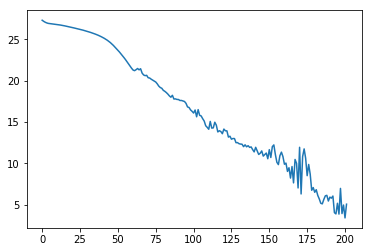

In [49]:
plt.plot(losses['total'])

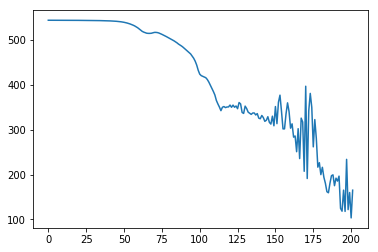

In [50]:
plt.plot(losses['loc'])

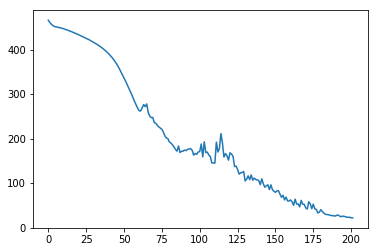

In [51]:
plt.plot(losses['conf'])

In [57]:
bbs_preds, cats_preds = preds

In [58]:
from ssdmultibox.plotting import *

idx = 0
targets = get_anchor_bbs_targets(bbs_preds, gt_cats, idx)
targets

tensor([[100.0000, 100.0000, 200.0000, 200.0000],
        [ 50.0000, 100.0000, 250.0000, 200.0000],
        [100.0000, 100.0000, 300.0000, 200.0000],
        [ 97.2954, 100.0000, 202.7046, 200.0000]], device='cuda:0')

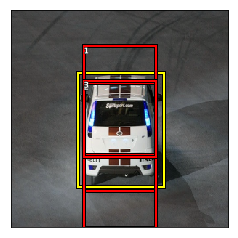

In [59]:
import cv2
import numpy as np
import torch

import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
from ssdmultibox.datasets import SIZE, Bboxer, device
from ssdmultibox.utils import open_image


def plot_single_predictions(dataset, idx, targets):
    """
    Plots the gt bb(s) and predicted bbs

    Args:
        dataset (torch.utils.data.Dataset)
        idx (int): index of dataset item to show
        targets (2d array):
            fastai formatted bbs to plot
    """
    image_id, im, gt_bbs, gt_cats = dataset[idx]
    ann = dataset.get_annotations()[image_id]
    im = open_image(ann['image_path'])
    resized_im = cv2.resize(im, (SIZE, SIZE))
    ax = show_img(resized_im)

    for gt_bb in (Bboxer.scaled_pascal_bbs(np.array(ann['bbs']), im) * SIZE):
        draw_rect(ax, gt_bb, edgecolor='yellow')

    for i, bb in enumerate(targets):
        gt_overlap_bb = Bboxer.fastai_bb_to_pascal_bb(bb)
        draw_rect(ax, gt_overlap_bb, edgecolor='red')
        draw_text(ax, gt_overlap_bb[:2], i, sz=8)

plot_single_predictions(dataset, idx, targets)

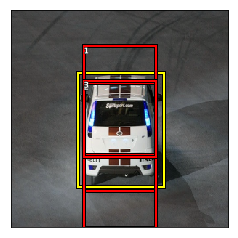

In [60]:
def plot_anchor_bbs_targets_from_preds(dataset, image_ids, idx, bbs_preds, gt_cats):
    image_id = image_ids[idx].item()
    dataset_idx = dataset.get_image_id_idx_map()[image_id]
    plot_single_predictions(
        dataset, dataset_idx,
        targets=get_anchor_bbs_targets(bbs_preds, gt_cats, idx))

plot_anchor_bbs_targets_from_preds(dataset, image_ids, idx, bbs_preds, gt_cats)

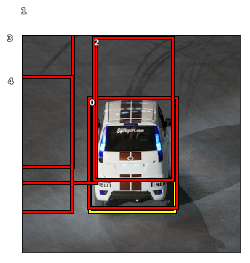

In [61]:
from ssdmultibox.predict import Predict

def plot_nms_preds(dataset, image_ids, idx, preds, limit=5):
    image_id = image_ids[idx].item()
    dataset_idx = dataset.get_image_id_idx_map()[image_id]
    boxes, scores, ids = Predict.predict_all(preds, index=idx)
    plot_single_predictions(train_dataset, dataset_idx, boxes[:limit])
    
plot_nms_preds(train_dataset, image_ids, idx, preds, limit=5)

In [62]:
bbs_preds[0].sum()

tensor(-1281.4911, device='cuda:0', grad_fn=<SumBackward0>)

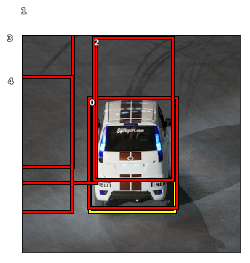

In [55]:
import torch

from ssdmultibox.datasets import BATCH, NUM_CLASSES, device, Bboxer, SIZE

CONF_THRESH = 0.1

def single_predict(cls_id, preds, index=0, conf_thresh=CONF_THRESH):
    """
    Full predictions for a single class

    Args:
        cls_id (int): category_id
        preds: mini-batch preds from model
        index (int): index of batch item to choose
        conf_thresh (float):
            percent confidence threshold to filter detections by
    Returns:
        tuple(bbs, scores) or None
    """

    # this adds the AnchorBox offsets to the preds
    bbs_preds, cats_preds = preds
    # class 20, background is ignored
    cats_preds = cats_preds[:,:,:-1]
    stacked_anchor_boxes = torch.tensor(
        Bboxer.get_stacked_anchor_boxes(), dtype=bbs_preds.dtype).to(device)*SIZE
    bbs_preds_w_offsets = stacked_anchor_boxes  + bbs_preds
    preds = (bbs_preds_w_offsets, cats_preds)

    bbs, cats = preds
    item_bbs, item_cats = bbs[index], cats[index]
    return Predict.single_nms(cls_id, item_bbs, item_cats, conf_thresh)

Predict.single_predict = single_predict

plot_nms_preds(train_dataset, image_ids, idx, preds, limit=5)

In [63]:
import torch
import torch.nn.functional as F
from torch import nn
from ssdmultibox.datasets import NUM_CLASSES, SIZE, device, Bboxer
from ssdmultibox.config import cfg

class BbsL1Loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.stacked_anchor_boxes = torch.tensor(
            Bboxer.get_stacked_anchor_boxes(), dtype=torch.float32).to(device)*SIZE

    def forward(self, inputs, targets):
        preds = inputs
        gt_bbs, gt_cats = targets
        preds_w_offsets =  self.stacked_anchor_boxes + preds
        gt_idxs = gt_cats != 20
        inputs = torch.clamp(preds_w_offsets[gt_idxs], min=0, max=SIZE)
        targets = gt_bbs[gt_idxs].type(inputs.dtype)
        pdb.set_trace()
        return F.smooth_l1_loss(inputs, targets, reduction='sum')
    
bbs_loss = BbsL1Loss()
bbs_loss(bbs_preds, (gt_bbs, gt_cats))

> <ipython-input-63-86541eac1b39>(21)forward()
-> return F.smooth_l1_loss(inputs, targets, reduction='sum')
(Pdb) inputs[:4]
tensor([[ 76.8392,  90.3532, 211.0602, 213.9441],
        [ 87.0089,  91.9875, 238.2401, 212.8869],
        [ 81.4142,  91.4637, 236.2261, 211.5732],
        [ 82.5054,  91.2759, 211.8275, 213.4746]],
       device='cuda:0', grad_fn=<SliceBackward>)
(Pdb) targets[:4]
tensor([[ 86.4865,  93.0000, 242.2432, 209.6000],
        [ 86.4865,  93.0000, 242.2432, 209.6000],
        [ 86.4865,  93.0000, 242.2432, 209.6000],
        [ 86.4865,  93.0000, 242.2432, 209.6000]], device='cuda:0')
(Pdb) c


tensor(825.8316, device='cuda:0', grad_fn=<SmoothL1LossBackward>)

> <ipython-input-40-439ab79c9337>(22)single_predict()
     20 
     21     # this adds the AnchorBox offsets to the preds
---> 22     bbs_preds, cats_preds = preds
     23     # class 20, background is ignored
     24     cats_preds = cats_preds[:,:,:-1]

ipdb> type(preds)
<class 'int'>
ipdb> preds
0
ipdb> c


In [27]:
image_ids

tensor([12, 17, 23, 26])